In [3]:
import sys
import os
sys.path.append(os.environ["CODE_REPOSITORY"])
from code_repository.hotones.thetools import *
import matplotlib.pyplot as plt
from snudda.utils.load import SnuddaLoad

In [4]:
external = os.path.join("/media","jofrony", "2TB", "dardel","current_bgd2","population_unit", 
                        "distance_complete", "supercomputer", "networks")

In [5]:
folder = "frequency"

In [6]:
parameters = {"start": 1, "end": 1.5}

In [7]:
e = Experiments()
e.add_experiment(name="p1_control",
                 color="black",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-14"),
                 output="network_output_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1.hdf5")


e.add_experiment(name="p1_DA",
                 color="red",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-14"),
                 output="network_output_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1_dopamine_modulation_method_alpha_background_tstart_300_tonic_0.2_gmax_increase_0.8_tau_500.hdf5")



e.add_experiment(name="p1_p2_control",
                 color="black",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-14"),
                 output="network_output_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1_p2.hdf5")


e.add_experiment(name="p1_p2_DA",
                 color="red",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-14"),
                 output="network_output_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1_p2_dopamine_modulation_method_alpha_background_tstart_300_tonic_0.2_gmax_increase_0.8_tau_500.hdf5")

   
e.experiments     

{'p1_control': {'color': 'black',
  'label': '2500 ms stimulation',
  'network': 'network-synapses.hdf5',
  'path': '/media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14',
  'output': 'network_output_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1.hdf5'},
 'p1_DA': {'color': 'red',
  'label': '2500 ms stimulation',
  'network': 'network-synapses.hdf5',
  'path': '/media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14',
  'output': 'network_output_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1_dopamine_modulation_method_alpha_background_tstart_300_tonic_0.2_gmax_increase_0.8_tau_500.hdf5'},
 'p1_p2_control': {'color': 'black',
  'label': '2500 ms stimulation',
  'network': 'network-synapses.hdf5',
  'path': '/media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14',
  '

In [8]:
sl = LoadSimulations(experiments=e)
sl.load_network_file(load_synapses=False)

Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14/simulation/network_output_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14/simulation/network_output_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1_dopamine_modulation_method_alpha_background_tstart_300_tonic_0.2_gmax_increase_0.8_tau_500.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14/simulation/network_output_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1_p2.hdf5
Loading 40000 neurons with 35040256 synaps

In [9]:
%%time
neuron_type = "dSPN"
specific_trace_ids = sl.get_population_units(neuron_type=neuron_type, population_unit=1)
frequency_analysis_dict = frequency_analysis(data_obj=sl, neuron_type=neuron_type, trace_ids=specific_trace_ids, parameters=parameters)


CPU times: user 18.2 s, sys: 1.1 s, total: 19.3 s
Wall time: 2min 1s


In [10]:
colors = {"p1_control": "black",
         "p1_p2_control": "green",
          "p1_DA": "red",
         "p1_p2_DA": "purple"}
bins=10

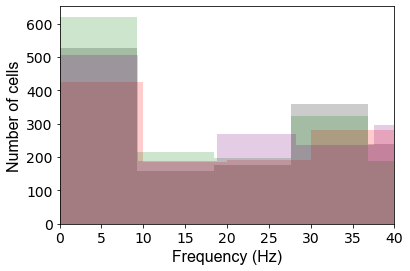

In [11]:
fig_name = f"{neuron_type}_above_0Hz"
plot_histogram_frequency(frequency_dict=frequency_analysis_dict, experiment_names=e,
                         fig_name=fig_name, 
                         colors=colors,bins=bins,
                         parameters={plt.xlim: (0,40)},
                         folder=folder, save=True)

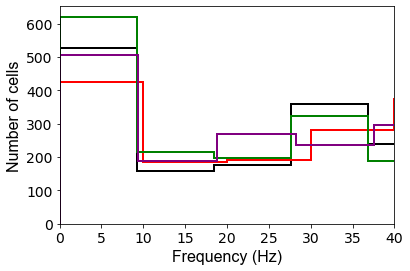

In [12]:
fig_name = f"{neuron_type}_above_0Hz"
plot_histogram_frequency_step(frequency_dict=frequency_analysis_dict, experiment_names=e,
                         fig_name=fig_name, 
                         colors=colors,bins=bins,
                         parameters={plt.xlim: (0,40)},
                         folder=folder, save=True)

In [13]:
mean_frequency_dict = mean_frequency(dictionary=frequency_analysis_dict, parameters={"interval": [10,60]})

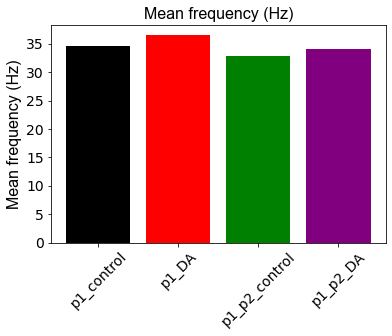

In [14]:
plot_mean_frequency(mean_frequency_dict = mean_frequency_dict, folder=folder,colors=colors, experiment_names=e)

In [15]:
parameters = dict(pairs=list())

for d in ["control","DA"]:
    parameters["pairs"].append([f"p1_{d}", f"p1_p2_{d}", f"{d}"])
change = change_mean_frequency(dictionary=mean_frequency_dict, parameters=parameters)
parameters

{'pairs': [['p1_control', 'p1_p2_control', 'control'],
  ['p1_DA', 'p1_p2_DA', 'DA']]}

In [16]:
colors = {"control": "black",
          "DA":"red"}

In [22]:
customize={plt.ylim:(-10,0)}

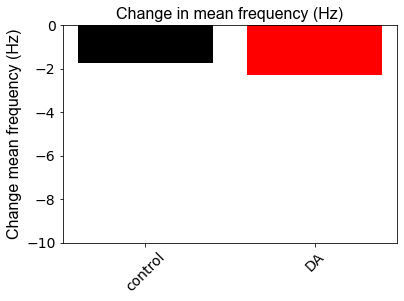

In [23]:
plot_change_mean_frequency(change_mean_frequency_dict = change, folder=folder,colors=colors, experiment_names=["control", "DA"], save=True,customize=customize)

In [24]:
parameters = {"start": 1, "end": 1.5}

In [27]:
csfont = {"fontname": "Arial", 'fontsize': 22}

In [28]:
import pandas as pd
import seaborn as sns
d = {"distance": list(), "response": list()}
tmps = dict()
for distance in ["control","DA"]:
    tmps.update({distance: list()})
    for ids in frequency_analysis_dict[f"p1_{distance}"]:
        d["distance"].append(distance)
        diff = frequency_analysis_dict[f"p1_p2_{distance}"][ids] - frequency_analysis_dict[f"p1_{distance}"][ids]
        tmps[distance].append(diff)
        d["response"].append(diff)
df = pd.DataFrame(data=d)

(array([-80., -60., -40., -20.,   0.,  20.,  40.,  60.,  80.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

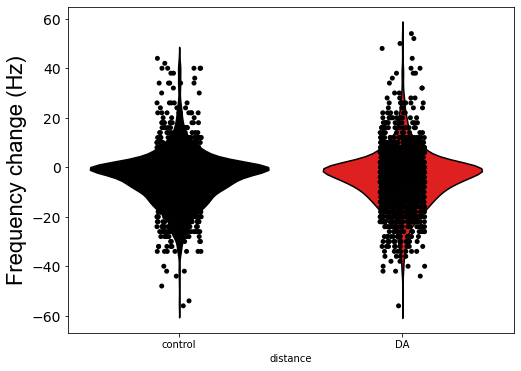

In [29]:
colors = {"control": "black",
          "DA":"red"}
plt.figure(figsize=(8, 6))
sns.violinplot(x="distance", y="response", data=df,palette=colors)
sns.stripplot(x="distance", y="response", data=df,
              color="black", edgecolor="gray")

plt.ylabel("Frequency change (Hz)", **csfont)
plt.yticks(fontsize=14)

In [30]:
%%time
neuron_type = "iSPN"
specific_trace_ids = sl.get_population_units(neuron_type=neuron_type, population_unit=1)
frequency_analysis_dict = frequency_analysis(data_obj=sl, neuron_type=neuron_type, trace_ids=specific_trace_ids, parameters=parameters)


CPU times: user 18.3 s, sys: 1.09 s, total: 19.4 s
Wall time: 1min 29s


In [31]:
colors = {"p1_control": "black",
         "p1_p2_control": "green",
          "p1_DA": "red",
         "p1_p2_DA": "purple"}
bins=10

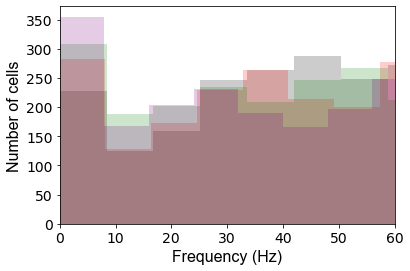

In [32]:
fig_name = f"{neuron_type}_above_0Hz"
plot_histogram_frequency(frequency_dict=frequency_analysis_dict, experiment_names=e,
                         fig_name=fig_name, 
                         colors=colors,bins=bins,
                         parameters={plt.xlim: (0,60)},
                         folder=folder, save=True)

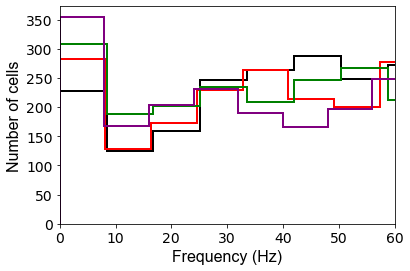

In [33]:
fig_name = f"{neuron_type}_above_0Hz"
plot_histogram_frequency_step(frequency_dict=frequency_analysis_dict, experiment_names=e,
                         fig_name=fig_name, 
                         colors=colors,bins=bins,
                         parameters={plt.xlim: (0,60)},
                         folder=folder, save=True)

In [34]:
mean_frequency_dict = mean_frequency(dictionary=frequency_analysis_dict, parameters={"interval": [10,60]})

In [35]:
colors = {"p1_control": "black",
         "p1_p2_control": "green",
          "p1_DA": "red",
         "p1_p2_DA": "purple"}
bins=10

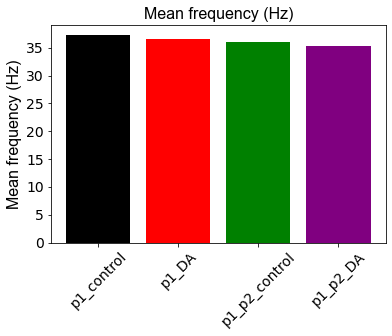

In [36]:
plot_mean_frequency(mean_frequency_dict = mean_frequency_dict, folder=folder,colors=colors, experiment_names=e)

In [37]:
parameters = dict(pairs=list())

for d in ["control","DA"]:
    parameters["pairs"].append([f"p1_{d}", f"p1_p2_{d}", f"{d}"])
change = change_mean_frequency(dictionary=mean_frequency_dict, parameters=parameters)
parameters

{'pairs': [['p1_control', 'p1_p2_control', 'control'],
  ['p1_DA', 'p1_p2_DA', 'DA']]}

In [38]:
colors = {"control": "black",
          "DA":"red"}

In [42]:
customize={plt.ylim:(-2,0)}

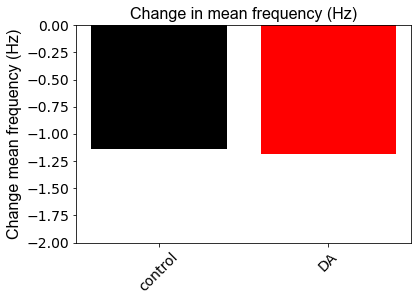

In [43]:
plot_change_mean_frequency(change_mean_frequency_dict = change, folder=folder,colors=colors, experiment_names=["control", "DA"], save=True,customize=customize)

In [44]:
parameters = {"start": 1, "end": 1.5}

In [45]:
import pandas as pd
import seaborn as sns
d = {"distance": list(), "response": list()}
tmps = dict()
for distance in ["control","DA"]:
    tmps.update({distance: list()})
    for ids in frequency_analysis_dict[f"p1_{distance}"]:
        d["distance"].append(distance)
        diff = frequency_analysis_dict[f"p1_p2_{distance}"][ids] - frequency_analysis_dict[f"p1_{distance}"][ids]
        tmps[distance].append(diff)
        d["response"].append(diff)
df = pd.DataFrame(data=d)

(array([-80., -60., -40., -20.,   0.,  20.,  40.,  60.,  80.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

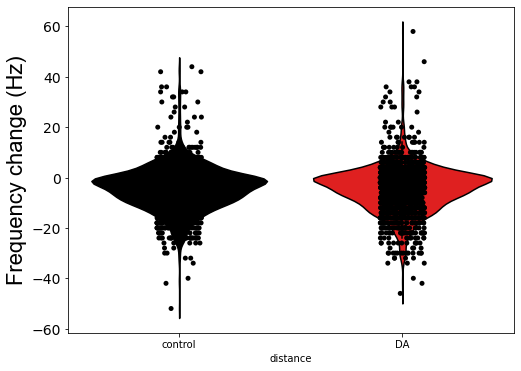

In [46]:
colors = {"control": "black",
          "DA":"red"}
plt.figure(figsize=(8, 6))
sns.violinplot(x="distance", y="response", data=df,palette=colors)
sns.stripplot(x="distance", y="response", data=df,
              color="black", edgecolor="gray")

plt.ylabel("Frequency change (Hz)", **csfont)
plt.yticks(fontsize=14)